In [1]:
import pandas as pd
import re
import itertools
import networkx as nx
import pylab as plt

In [2]:
df = pd.read_csv('./data/film_festivals.csv', keep_default_na=False)

In [3]:
df_network = df[~(df['Director'].isin(['N/A', '']) & df['Writer'].isin(['N/A', '']) & df['Actors'].isin(['N/A', '']))][['Director', 'Writer', 'Actors']]
df_network['Writer'] = df_network['Writer'].apply(lambda row: re.sub(' \(.*?\)', '', row))
df_network = df_network.reset_index(drop=True)
df_network.head()

,Director,Writer,Actors
0,Youssef Chahine,"Youssef Chahine, Yusri Nasrullah","Michel Piccoli, Mohsen Mohieddin, Patrice Chér..."
1,Alan Parker,"William Wharton, Sandy Kroopf, Jack Behr","Matthew Modine, Nicolas Cage, John Harkins, Sa..."
2,Ray Lawrence,"Ray Lawrence, Peter Carey, Peter Carey","Barry Otto, Lynette Curran, Helen Jones, Miles..."
3,Dusan Makavejev,"Frank Moorhouse, Denny Lawrence, Frank Moorhouse","Eric Roberts, Greta Scacchi, Bill Kerr, Chris ..."
4,István Szabó,"István Szabó, Péter Dobai, John Osborne","Klaus Maria Brandauer, Hans Christian Blech, A..."


## Example

In [4]:
directors = df_network.iloc[0]['Director'].split(', ')
directors = [(director, 'director') for director in directors]
writers = df_network.iloc[0]['Writer'].split(', ')
writers = [(writer, 'writer') for writer in writers]
actors = df_network.iloc[0]['Actors'].split(', ')
actors = [(actor, 'actor') for actor in actors]
people = directors
people.extend(actors) # the other of the extends determines the order of priority: director -> actor -> writer for people who have multiple roles
people.extend(writers)

In [5]:
name = [person[0] for person in people]
role = [person[1] for person in people]
nodelist = pd.DataFrame({'Name': name,
                         'Role': role})
nodelist = nodelist.drop_duplicates(subset='Name').reset_index(drop=True)
nodelist

,Name,Role
0,Youssef Chahine,director
1,Michel Piccoli,actor
2,Mohsen Mohieddin,actor
3,Patrice Chéreau,actor
4,Mohamad Atef,actor
5,Yusri Nasrullah,writer


In [6]:
edges = [combo for combo in itertools.combinations(nodelist['Name'], 2)]
edgelist = pd.DataFrame(edges, columns=['Source', 'Target'])
edgelist

,Source,Target
0,Youssef Chahine,Michel Piccoli
1,Youssef Chahine,Mohsen Mohieddin
2,Youssef Chahine,Patrice Chéreau
3,Youssef Chahine,Mohamad Atef
4,Youssef Chahine,Yusri Nasrullah
5,Michel Piccoli,Mohsen Mohieddin
6,Michel Piccoli,Patrice Chéreau
7,Michel Piccoli,Mohamad Atef
8,Michel Piccoli,Yusri Nasrullah
9,Mohsen Mohieddin,Patrice Chéreau


### Running Social Network Analysis

In [7]:
node_names = list(nodelist['Name'])
node_names

['Youssef Chahine',
 'Michel Piccoli',
 'Mohsen Mohieddin',
 'Patrice Chéreau',
 'Mohamad Atef',
 'Yusri Nasrullah']

In [8]:
edges

[('Youssef Chahine', 'Michel Piccoli'),
 ('Youssef Chahine', 'Mohsen Mohieddin'),
 ('Youssef Chahine', 'Patrice Chéreau'),
 ('Youssef Chahine', 'Mohamad Atef'),
 ('Youssef Chahine', 'Yusri Nasrullah'),
 ('Michel Piccoli', 'Mohsen Mohieddin'),
 ('Michel Piccoli', 'Patrice Chéreau'),
 ('Michel Piccoli', 'Mohamad Atef'),
 ('Michel Piccoli', 'Yusri Nasrullah'),
 ('Mohsen Mohieddin', 'Patrice Chéreau'),
 ('Mohsen Mohieddin', 'Mohamad Atef'),
 ('Mohsen Mohieddin', 'Yusri Nasrullah'),
 ('Patrice Chéreau', 'Mohamad Atef'),
 ('Patrice Chéreau', 'Yusri Nasrullah'),
 ('Mohamad Atef', 'Yusri Nasrullah')]

In [9]:
G = nx.Graph()
G.add_nodes_from(node_names)
G.add_edges_from(edges)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 6
Number of edges: 15
Average degree:   5.0000


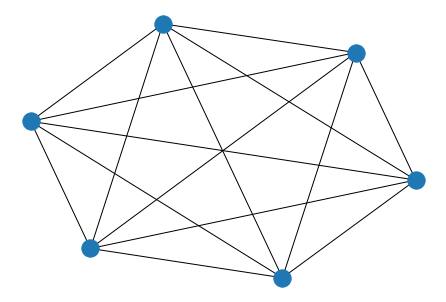

In [10]:
nx.draw(G) 

## Combining Graphs for Two Films

In [11]:
df_network[df_network['Director']=='Lars von Trier']

,Director,Writer,Actors
25,Lars von Trier,"Lars von Trier, Niels Vørsel","Jean-Marc Barr, Barbara Sukowa, Udo Kier, Erns..."
124,Lars von Trier,Lars von Trier,"Willem Dafoe, Charlotte Gainsbourg, Storm Ache..."
171,Lars von Trier,Lars von Trier,"Kirsten Dunst, Charlotte Gainsbourg, Alexander..."
3610,Lars von Trier,"Niels Vørsel, William Quarshie, Stephen Wakela...","Michael Elphick, Esmond Knight, Me Me Lai, Jer..."
3758,Lars von Trier,"Lars von Trier, Peter Asmussen","Emily Watson, Stellan Skarsgård, Katrin Cartli..."
3811,Lars von Trier,Lars von Trier,"Bodil Jørgensen, Jens Albinus, Anne Louise Has..."
3844,Lars von Trier,Lars von Trier,"Björk, Catherine Deneuve, David Morse, Peter S..."
3910,Lars von Trier,Lars von Trier,"Nicole Kidman, Harriet Andersson, Lauren Bacal..."
3955,Lars von Trier,Lars von Trier,"Bryce Dallas Howard, Isaach De Bankolé, Danny ..."


In [12]:
directors = df_network.iloc[25]['Director'].split(', ')
directors = [(director, 'director') for director in directors]
writers = df_network.iloc[25]['Writer'].split(', ')
writers = [(writer, 'writer') for writer in writers]
actors = df_network.iloc[25]['Actors'].split(', ')
actors = [(actor, 'actor') for actor in actors]
people = directors
people.extend(actors) # the other of the extends determines the order of priority: director -> actor -> writer for people who have multiple roles
people.extend(writers)

name = [person[0] for person in people]
role = [person[1] for person in people]
nodelist = pd.DataFrame({'Name': name,
                         'Role': role})
nodelist = nodelist.drop_duplicates(subset='Name').reset_index(drop=True)

edges = [combo for combo in itertools.combinations(nodelist['Name'], 2)]
edgelist = pd.DataFrame(edges, columns=['Source', 'Target'])

node_names = list(nodelist['Name'])

G = nx.Graph()
G.add_nodes_from(node_names)
G.add_edges_from(edges)

In [13]:
directors = df_network.iloc[124]['Director'].split(', ')
directors = [(director, 'director') for director in directors]
writers = df_network.iloc[124]['Writer'].split(', ')
writers = [(writer, 'writer') for writer in writers]
actors = df_network.iloc[124]['Actors'].split(', ')
actors = [(actor, 'actor') for actor in actors]
people = directors
people.extend(actors) # the other of the extends determines the order of priority: director -> actor -> writer for people who have multiple roles
people.extend(writers)

name = [person[0] for person in people]
role = [person[1] for person in people]
nodelist = pd.DataFrame({'Name': name,
                         'Role': role})
nodelist = nodelist.drop_duplicates(subset='Name').reset_index(drop=True)

edges = [combo for combo in itertools.combinations(nodelist['Name'], 2)]
edgelist = pd.DataFrame(edges, columns=['Source', 'Target'])

node_names = list(nodelist['Name'])

H = nx.Graph()
H.add_nodes_from(node_names)
H.add_edges_from(edges)

{'Lars von Trier': Text(-0.6236853261666038, 0.7851240871205797, 'Lars von Trier'),
 'Jean-Marc Barr': Text(0.6135606372804784, -0.7771251859185528, 'Jean-Marc Barr'),
 'Barbara Sukowa': Text(0.36476106785564555, 0.9327542107716456, 'Barbara Sukowa'),
 'Udo Kier': Text(-0.9836629409001029, -0.14752068414353028, 'Udo Kier'),
 'Ernst-Hugo Järegård': Text(-0.3709734380694166, -0.9335090557802045, 'Ernst-Hugo Järegård'),
 'Niels Vørsel': Text(1.0, 0.1402766279500646, 'Niels Vørsel')}

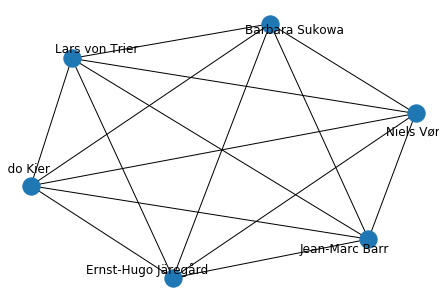

In [14]:
nx.draw(G)
nx.draw_networkx_labels(G,pos=nx.spring_layout(G))

{'Lars von Trier': Text(0.9999999999999988, -0.5677432730599783, 'Lars von Trier'),
 'Willem Dafoe': Text(-0.5589836935675886, -0.9845712315617987, 'Willem Dafoe'),
 'Charlotte Gainsbourg': Text(-1.0, 0.5677432730599772, 'Charlotte Gainsbourg'),
 'Storm Acheche Sahlstrøm': Text(0.5589836935675905, 0.9845712315617997, 'Storm Acheche Sahlstrøm')}

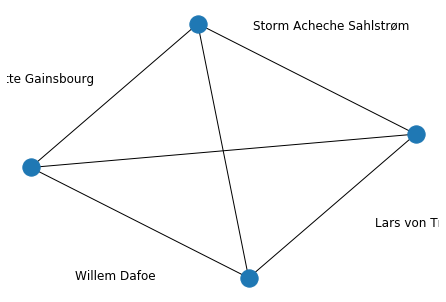

In [15]:
nx.draw(H)
nx.draw_networkx_labels(H,pos=nx.spring_layout(H))

In [16]:
U = nx.compose(G, H)

{'Lars von Trier': Text(-0.000989869437918441, -0.09813708594788124, 'Lars von Trier'),
 'Jean-Marc Barr': Text(-0.22091531857584992, 0.33828163760460067, 'Jean-Marc Barr'),
 'Barbara Sukowa': Text(0.30627751789981583, 0.6020339540086924, 'Barbara Sukowa'),
 'Udo Kier': Text(0.20467152744084613, 0.33026693488493986, 'Udo Kier'),
 'Ernst-Hugo Järegård': Text(-0.27881504159847226, 0.6233499717907084, 'Ernst-Hugo Järegård'),
 'Niels Vørsel': Text(0.01578660925121004, 0.7436062709011015, 'Niels Vørsel'),
 'Willem Dafoe': Text(0.285087689612829, -0.7744574914658227, 'Willem Dafoe'),
 'Charlotte Gainsbourg': Text(-0.012332197542806329, -1.0, 'Charlotte Gainsbourg'),
 'Storm Acheche Sahlstrøm': Text(-0.298770917049654, -0.7649441917763387, 'Storm Acheche Sahlstrøm')}

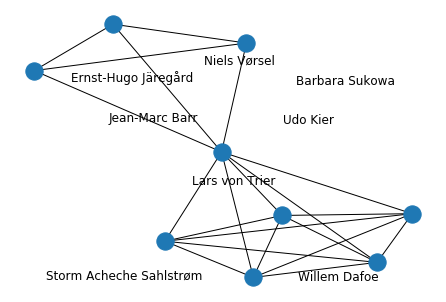

In [17]:
nx.draw(U)
nx.draw_networkx_labels(U,pos=nx.spring_layout(U))